# EDA

In [ ]:
click_rec_recent_week = load_combined_data(now= "2018-03-15", date_field='request_time', file_path=PATH_CLICK, Filter=True, from_start=False, num_predays = 7, output_folder=output_folder)

In [274]:
a = click_rec_recent_week

# feature string combine
a['combined_attr'] = a[['type', 'attribute1', 'attribute2']].astype(str).apply(lambda x: "__".join(x), axis=1) 
# b is a table of combined_attr, sku_ID, count of click by user_ID
b = a.groupby(['combined_attr','sku_ID'])['user_ID'].count().reset_index() 
# c is highest rank items of each attributes table 
c = b.groupby(['combined_attr']).apply(lambda x: x.nlargest(rs_topItem, columns=['user_ID'])['sku_ID'].tolist()).rename('items').to_frame() # sort with rs_topItem highest items for each combine attr
# pred_itab is join c table with combined_attr
pred_itab = b.merge(c, left_on='combined_attr', right_index=True)[['sku_ID','items']].set_index('sku_ID')

In [280]:
a.groupby(["combined_attr",'gender'])['user_ID'].count()

combined_attr  gender
1__-__-        F         197
               M          60
               U          32
1__-__100.0    M           2
1__2.0__-      F          94
                        ... 
2__4.0__60.0   F          91
               M          12
               U          18
2__4.0__70.0   F           2
2__4.0__90.0   F           4
Name: user_ID, Length: 113, dtype: int64

In [347]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)


<AxesSubplot:title={'center':'AGE V.S. COMBINED_ITEM_ATTR'}>

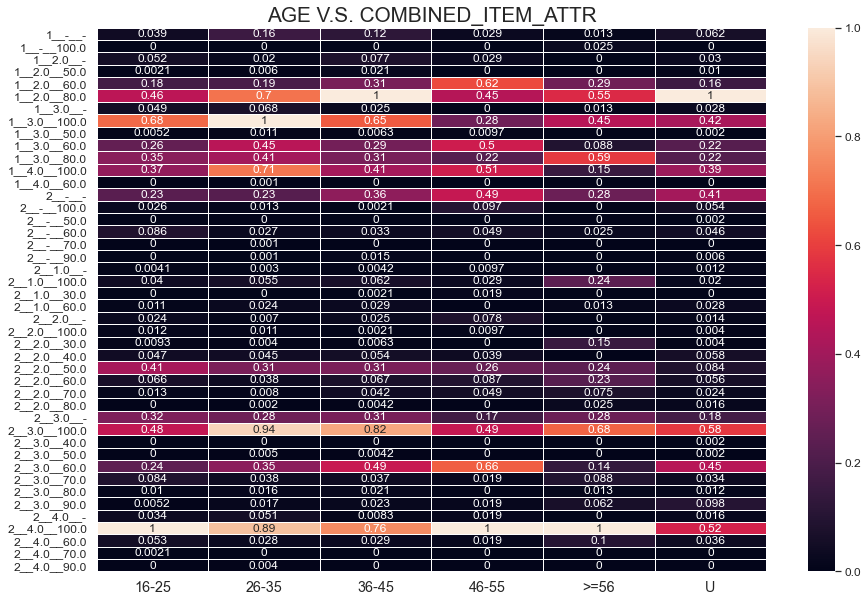

In [348]:
target_attr = 'age'
panel_data = a.groupby(["combined_attr",target_attr])['user_ID'].count().reset_index().pivot_table(index='combined_attr', columns=target_attr, values='user_ID').fillna(0)


scalar = MinMaxScaler().fit(panel_data)
scaled_panel_data = scalar.transform(panel_data)
fig, ax = plt.subplots()
ax.set(title=str(target_attr+ " v.s. " + "combined_item_attr").upper())
sns.heatmap( scaled_panel_data, annot=True, linewidths=.5, ax=ax, xticklabels=panel_data.columns, yticklabels=panel_data.index)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span></li></ul></div>

In [ ]:
a = click_rec_recent_week

# feature string combine
a['combined_attr'] = a[['type', 'attribute1', 'attribute2']].astype(str).apply(lambda x: "__".join(x), axis=1) 
# b is a table of combined_attr, sku_ID, count of click by user_ID
b = a.groupby(['combined_attr','sku_ID'])['user_ID'].count().reset_index() 
# c is highest rank items of each attributes table 
c = b.groupby(['combined_attr']).apply(lambda x: x.nlargest(rs_topItem, columns=['user_ID'])['sku_ID'].tolist()).rename('items').to_frame() # sort with rs_topItem highest items for each combine attr
# pred_itab is join c table with combined_attr
pred_itab = b.merge(c, left_on='combined_attr', right_index=True)[['sku_ID','items']].set_index('sku_ID')